In [5]:
import math
import numpy as np
import pandas as pd
import pints
import matplotlib.pyplot as plt
import os
plt.rcParams.update({'font.size': 24})
from Newton_Cap_model_Numba import newtonRaphsonCap, wrappedNewtonCap

In [6]:

data_name = 'data_90992'
file_name = data_name + '.txt'
folder = os.path.join('Data', 'processed')
folder = os.path.join(folder, 'old_current')
data_file = os.path.join(folder, file_name)

# creating file for output
output_file_name = 'fitting_for_capacitance_data.txt'
f= open(os.path.join( folder, output_file_name),"w")

# opening data
experimental_data = pd.read_csv(data_file, sep='\t')

exp_times = np.asarray(experimental_data.times)
exp_current = np.asarray(experimental_data.current)

In [18]:
# delacring know model paramters
inital_current = exp_current[0]
freq = 8.95931721948
startPotential= -0.15
revPotential = -0.75
rateOfPotentialChange = -22.35e-3
deltaepislon = 150E-3
electrode_area = 0.03
electode_coverage = 6.5e-12
numberOfMeasurements = exp_times.shape

# sepcifing model to get I0 for non deminsionalisation
trial = newtonRaphsonCap(timeStepSize = exp_times[1], numberOfMeasurements = numberOfMeasurements[0], startPotential= startPotential,
                         revPotential = revPotential, rateOfPotentialChange = rateOfPotentialChange, inital_current=inital_current,
                         freq=freq, deltaepislon=deltaepislon, electrode_area=electrode_area, electode_coverage=electode_coverage)

# non-diming experimental data
exp_current_dimless = exp_current/trial.I0

print(exp_times[1])
print(exp_times[1]*(90992/2))

0.0005888
26.7880448


In [19]:
# working out reversal time

# time step size
deno = numberOfMeasurements[0]
print(numberOfMeasurements[0]-1)
print(exp_times[-1]/deno)

print((exp_times[-1]/deno)*(90992/2))

90991
0.0005887935203094777
26.787749999999996


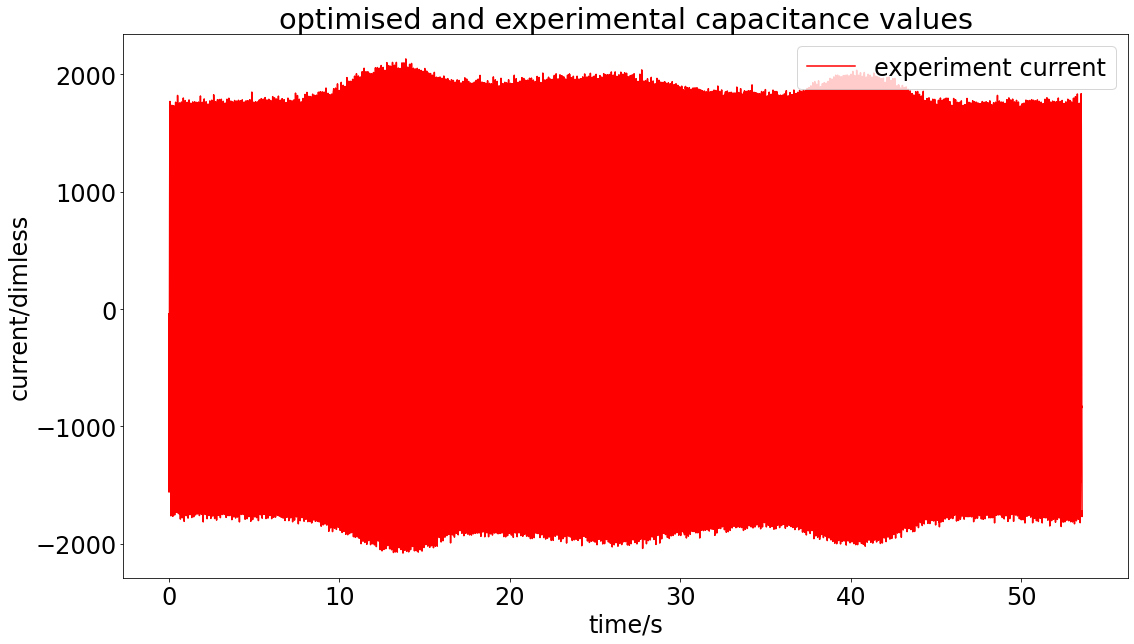

In [8]:
xaxis = exp_times #model.potentialRange
xaxislabel = "time/s" # "potential/V"
solution = exp_current_dimless

plt.figure(figsize=(18,10))
plt.title("optimised and experimental capacitance values")
plt.ylabel("current/dimless")
plt.xlabel(xaxislabel)
plt.plot(xaxis, exp_current_dimless,'r', label='experiment current')
plt.legend(loc='best')
plt.show()
